<a href="https://colab.research.google.com/github/Raghnus/renidimiento_jugadores/blob/main/Rendimiento_Jugadores_Dota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
df_hero = pd.read_csv('/content/drive/MyDrive/PTCienciaDatos/Poryecto2/train/hero_data.csv')
df_hero.head()

,hero_id,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,agi,Melee,Carry:Escape:Nuker,200,1.50,75,0.9,-1.0,25,...,22,12,1.3,2.8,1.8,150,0,1.45,310,0.5
1,2,str,Melee,Initiator:Durable:Disabler:Jungler,200,4.25,75,0.9,-1.0,25,...,20,18,2.8,2.2,1.6,150,900,1.70,290,0.6
2,3,int,Ranged,Support:Disabler:Nuker:Durable,200,1.50,75,0.9,1.0,25,...,23,23,2.4,2.4,2.4,400,900,1.70,310,0.6
3,4,agi,Melee,Carry:Disabler:Jungler:Nuker:Initiator,200,1.50,75,0.9,0.0,25,...,24,18,2.7,3.0,1.7,150,900,1.70,285,0.5
4,5,int,Ranged,Support:Disabler:Nuker:Jungler,200,1.50,75,0.9,-1.0,25,...,16,16,2.0,1.6,2.9,600,900,1.70,275,0.5


In [ ]:
df_hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hero_id                115 non-null    int64  
 1   primary_attr           115 non-null    object 
 2   attack_type            115 non-null    object 
 3   roles                  115 non-null    object 
 4   base_health            115 non-null    int64  
 5   base_health_regen      115 non-null    float64
 6   base_mana              115 non-null    int64  
 7   base_mana_regen        115 non-null    float64
 8   base_armor             115 non-null    float64
 9   base_magic_resistance  115 non-null    int64  
 10  base_attack_min        115 non-null    int64  
 11  base_attack_max        115 non-null    int64  
 12  base_strength          115 non-null    int64  
 13  base_agility           115 non-null    int64  
 14  base_intelligence      115 non-null    int64  
 15  streng

In [ ]:
df_train9 = pd.read_csv('/content/drive/MyDrive/PTCienciaDatos/Poryecto2/train/train9.csv')
df_train9.head()

,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,1,74,1_74,304,185,3743.699732
1,1,65,1_65,255,151,4009.021513
2,1,39,1_39,203,135,5094.621514
3,1,106,1_106,158,106,4619.212963
4,1,2,1_2,157,94,2871.627907


In [ ]:
df_train9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    18846 non-null  int64  
 1   hero_id    18846 non-null  int64  
 2   id         18846 non-null  object 
 3   num_games  18846 non-null  int64  
 4   num_wins   18846 non-null  int64  
 5   kda_ratio  18846 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 883.5+ KB


In [ ]:
df_train1 = pd.read_csv('/content/drive/MyDrive/PTCienciaDatos/Poryecto2/train/train1.csv')
df_train1.head()

,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,1,41,1_41,201,125,3731.707317
1,2,17,2_17,427,234,2922.058381
2,5,106,5_106,240,130,5116.682739
3,6,65,6_65,206,122,4131.553861
4,7,69,7_69,697,382,2474.469306


In [ ]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2094 non-null   int64  
 1   hero_id    2094 non-null   int64  
 2   id         2094 non-null   object 
 3   num_games  2094 non-null   int64  
 4   num_wins   2094 non-null   int64  
 5   kda_ratio  2094 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 98.3+ KB


In [ ]:
def agrupar(df1,df2,df3):
  df = df1.merge(df2,how="left", on='hero_id')
  df = df.merge(df3,how='left', on='user_id')
  df.rename(columns={'hero_id_y':'hero_id'},inplace=True)
  df = df.merge(df2,how='left', on='hero_id')
  df.drop(columns=['id_x','id_y','roles_x','roles_y'], inplace=True)
  df['primary_attr_x']=df['primary_attr_x'].replace({'int':1,'agi':2,'str':3})
  df['primary_attr_y']=df['primary_attr_y'].replace({'int':1,'agi':2,'str':3})
  df['attack_type_x']= df['attack_type_x'].replace({'Ranged':1,'Melee':2})
  df['attack_type_y']= df['attack_type_x'].replace({'Ranged':1,'Melee':2})
  return df

In [ ]:
def insight(df):
  df['def_games']=df['num_games_y']-df['num_games_x']
  df['def_wins']=df['num_wins_y']-df['num_wins_x']
  df['def_bhealt']=df['base_health_y']-df['base_health_x']
  df['def_bhealt_regen']=df['base_health_regen_y']-df['base_health_regen_x']
  df['def_bmana']=df['base_mana_y']-df['base_mana_x']
  df['def_bmana_regen']=df['base_mana_regen_y']-df['base_mana_regen_x']
  df['def_barmor']=df['base_armor_y']-df['base_armor_x']
  df['def_bmagicr']=df['base_magic_resistance_y']-df['base_magic_resistance_x']
  df['def_batkm']=df['base_attack_min_y']-df['base_attack_min_x']
  df['def_batkx']=df['base_attack_max_y']-df['base_attack_max_x']
  df['def_bstr']=df['base_strength_y']-df['base_strength_x']
  df['def_bagl']=df['base_agility_y']-df['base_agility_x']
  df['def_bint']=df['base_intelligence_y']-df['base_intelligence_x']
  df['def_strg']=df['strength_gain_y']-df['strength_gain_x']
  df['def_aglg']=df['agility_gain_y']-df['agility_gain_x']
  df['def_intg']=df['intelligence_gain_y']-df['intelligence_gain_x']
  df['def_atkr']=df['attack_range_y']-df['attack_range_x']
  df['def_prs']=df['projectile_speed_y']-df['projectile_speed_x']
  df['def_atkrt']=df['attack_rate_y']-df['attack_rate_x']
  df['def_movs']=df['move_speed_y']-df['move_speed_x']
  df['def_turnr']=df['turn_rate_y']-df['turn_rate_x']
  return df

In [ ]:
df_rendimiento = agrupar(df_train9,df_hero,df_train1)
df_rendimiento = insight(df_rendimiento)
df_rendimiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18846 entries, 0 to 18845
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  18846 non-null  int64  
 1   hero_id_x                18846 non-null  int64  
 2   num_games_x              18846 non-null  int64  
 3   num_wins_x               18846 non-null  int64  
 4   kda_ratio_x              18846 non-null  float64
 5   primary_attr_x           18846 non-null  int64  
 6   attack_type_x            18846 non-null  int64  
 7   base_health_x            18846 non-null  int64  
 8   base_health_regen_x      18846 non-null  float64
 9   base_mana_x              18846 non-null  int64  
 10  base_mana_regen_x        18846 non-null  float64
 11  base_armor_x             18846 non-null  float64
 12  base_magic_resistance_x  18846 non-null  int64  
 13  base_attack_min_x        18846 non-null  int64  
 14  base_attack_max_x     

In [ ]:
df_rendimiento.describe()

,user_id,hero_id_x,num_games_x,num_wins_x,kda_ratio_x,primary_attr_x,attack_type_x,base_health_x,base_health_regen_x,base_mana_x,...,def_bagl,def_bint,def_strg,def_aglg,def_intg,def_atkr,def_prs,def_atkrt,def_movs,def_turnr
count,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.0,18846.000000,18846.0,...,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000
mean,1488.840974,49.286957,188.120344,106.459036,3543.462003,1.881832,1.471453,200.0,1.699379,75.0,...,0.149793,0.123740,-0.041048,0.020805,-0.010437,4.342831,7.155365,-0.002438,0.447044,0.000899
std,856.144028,34.674544,224.166666,132.167024,1081.195070,0.768159,0.499198,0.0,0.552141,0.0,...,5.928128,6.321423,0.736554,0.939916,0.949655,276.027542,619.787046,0.137876,17.548339,0.219103
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,200.0,1.000000,75.0,...,-30.000000,-18.000000,-2.500000,-3.700000,-3.500000,-560.000000,-3000.000000,-0.600000,-70.000000,-0.500000
25%,752.000000,14.000000,76.000000,42.000000,2841.265936,1.000000,1.000000,200.0,1.500000,75.0,...,-4.000000,-4.000000,-0.500000,-0.600000,-0.600000,-180.000000,-225.000000,0.000000,-10.000000,-0.100000
50%,1480.500000,46.000000,138.000000,77.000000,3403.463637,2.000000,1.000000,200.0,1.500000,75.0,...,0.000000,0.000000,-0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2233.000000,76.000000,228.000000,128.000000,4073.493596,2.000000,2.000000,200.0,1.500000,75.0,...,4.000000,4.000000,0.400000,0.700000,0.600000,200.000000,225.000000,0.000000,15.000000,0.100000
max,2992.000000,120.000000,7280.000000,5010.000000,38000.000000,3.000000,2.000000,200.0,4.750000,75.0,...,26.000000,18.000000,2.500000,3.300000,3.000000,550.000000,3000.000000,0.600000,70.000000,0.500000


<BarContainer object of 115 artists>

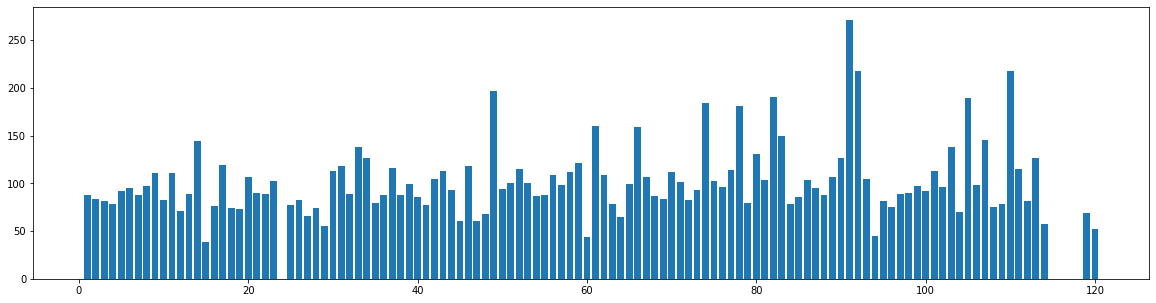

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(df_rendimiento.groupby(['hero_id_x'])['num_wins_x'].mean().index,df_rendimiento.groupby(['hero_id_x'])['num_wins_x'].mean().values)

<BarContainer object of 115 artists>

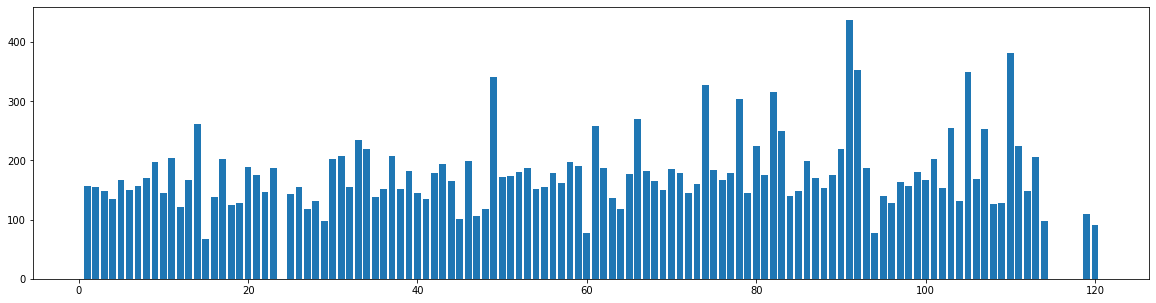

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(df_rendimiento.groupby(['hero_id_x'])['num_games_x'].mean().index,df_rendimiento.groupby(['hero_id_x'])['num_games_x'].mean().values)

<BarContainer object of 115 artists>

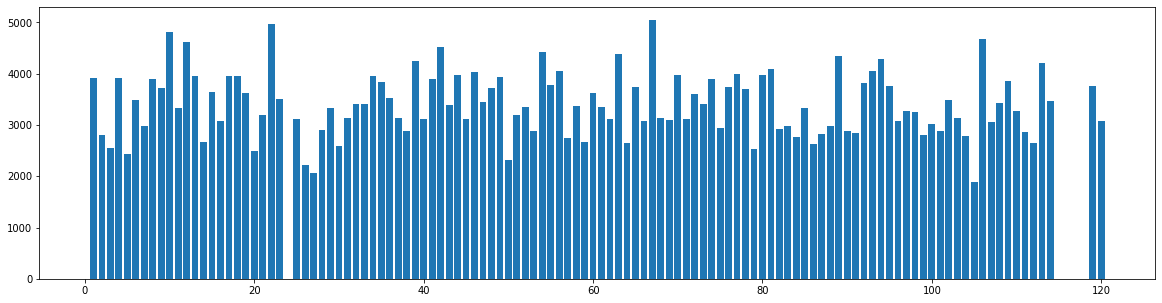

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(df_rendimiento.groupby(['hero_id_x'])['kda_ratio_x'].mean().index,df_rendimiento.groupby(['hero_id_x'])['kda_ratio_x'].mean().values)

<BarContainer object of 3 artists>

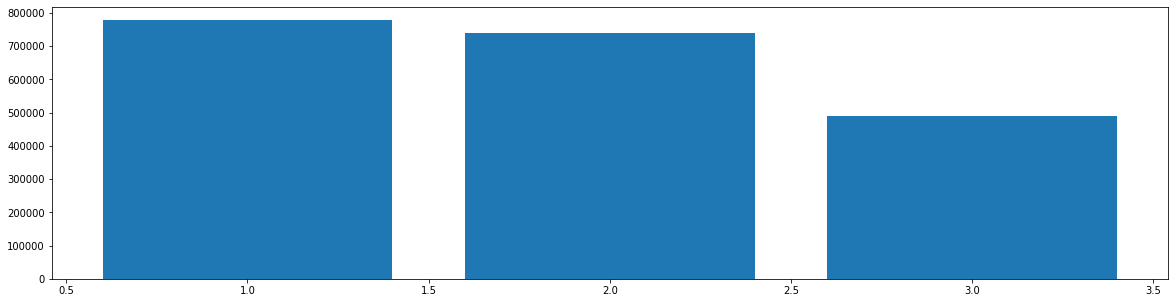

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(df_rendimiento.groupby(['primary_attr_x'])['num_wins_x'].sum().index,df_rendimiento.groupby(['primary_attr_x'])['num_wins_x'].sum().values)

<BarContainer object of 3 artists>

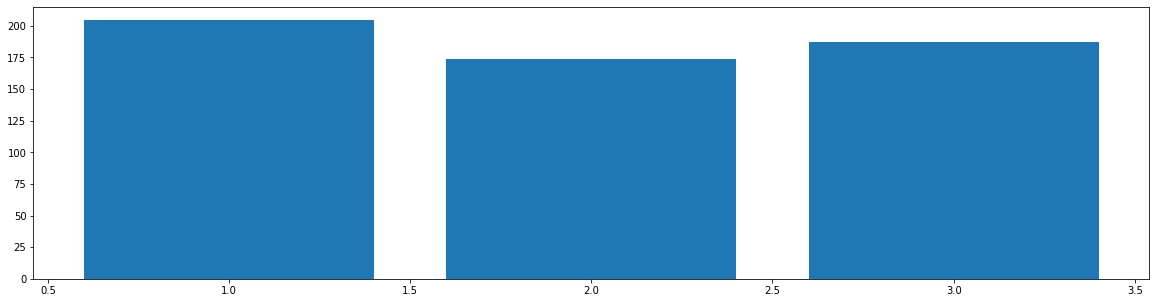

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(df_rendimiento.groupby(['primary_attr_x'])['num_games_x'].mean().index,df_rendimiento.groupby(['primary_attr_x'])['num_games_x'].mean().values)

<BarContainer object of 2 artists>

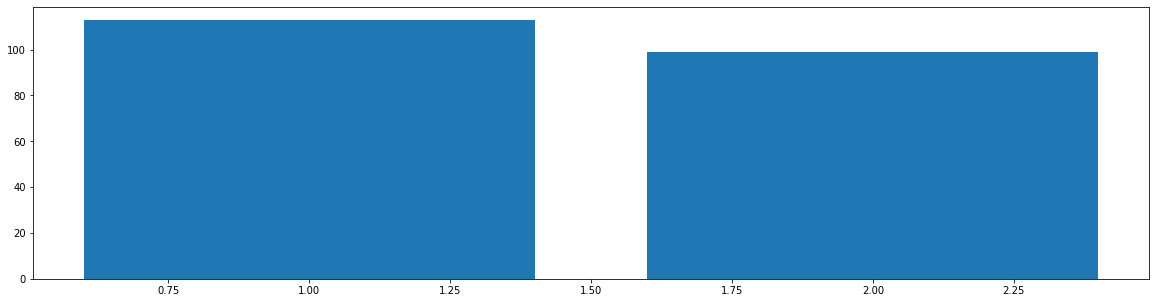

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(df_rendimiento.groupby(['attack_type_x'])['num_wins_x'].mean().index,df_rendimiento.groupby(['attack_type_x'])['num_wins_x'].mean().values)

<BarContainer object of 2 artists>

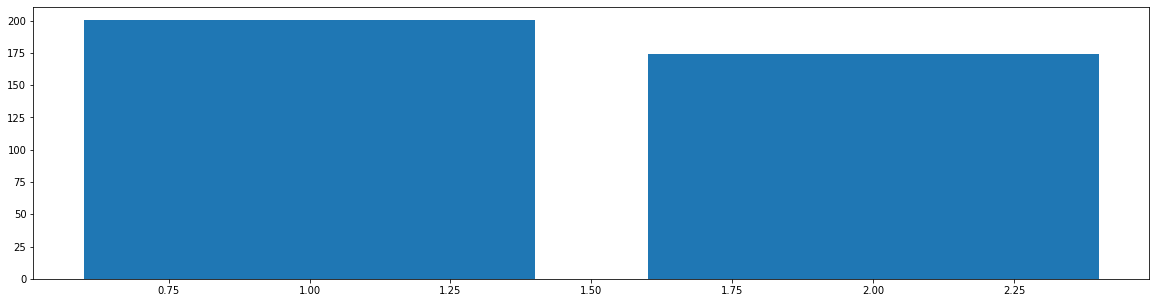

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(df_rendimiento.groupby(['attack_type_x'])['num_games_x'].mean().index,df_rendimiento.groupby(['attack_type_x'])['num_games_x'].mean().values)

In [ ]:
X = df_rendimiento.drop(columns={'num_wins_y','kda_ratio_y'})
y_wins = df_rendimiento['num_wins_y']
y_kda = df_rendimiento['kda_ratio_y']

In [ ]:
X_train_kda, X_test_kda, y_train_kda, y_test_kda, y_train_wins, y_test_wins = train_test_split(X, y_kda, y_wins,random_state=3,train_size=0.8)

In [ ]:
pipe_Rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_jobs=-1, random_state=10, n_estimators=200))
pipe_Rf.fit(X_train_kda,y_train_kda)
print(pipe_Rf.score(X_train_kda,y_train_kda))
print(pipe_Rf.score(X_test_kda,y_test_kda))

0.9624796087667005
0.7107196721899165


In [ ]:
sc = StandardScaler()
X_train_kda=sc.fit_transform(X_train_kda)
X_test_kda=sc.fit_transform(X_test_kda)

In [ ]:
arboles = list(range(200,1500,100))
scores = []
for arbol in arboles:
  rf = RandomForestRegressor(n_jobs=-1, n_estimators=arbol, random_state=2)
  rf.fit(X_train_kda,y_train_kda)
  scores.append(rf.score(X_test_kda,y_test_kda))

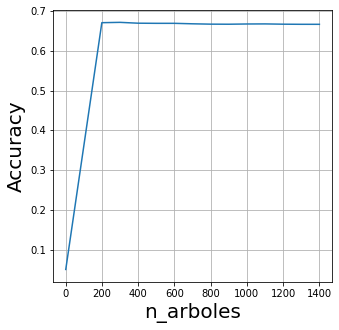

In [ ]:
fig, axes = plt.subplots(nrows =1, figsize = (5,5));
axes.plot(arboles, scores);
axes.set_xlabel('n_arboles', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()